# Using the manual implementation of the Chebyshev spectral method, study the stability profile of the 3D system at zero shear

In [6]:
import sys
sys.path.append("../core-scripts")
import zeroShearSpectrum2D
import zeroShearSpectrum3D
import zeroShearSpectrum3D_Power
from Utilities import prune_evs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from cheb import cheb

# Colors for plotting!
cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
def max_re(zs):
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

def plot_stability(acts, ks, evs):
    an = len(acts)
    kn = len(ks)
    gr_th_zr = np.real(evs) > 0
    for i in range(an):
        for j in range(kn):
            c = "red" if gr_th_zr[i][j] else "blue"
            plt.plot(ks[j],acts[i],".",color=c, picker=True)
            plt.xlabel("$k$")
            plt.ylabel("$a$")
            blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                                  markersize=10, label='stable')
            red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                                  markersize=10, label='unstable')
            plt.legend(handles=[blue_dot, red_dot], loc='upper right')

# Plotting independently the high and low resolution versions
Shows that simply increasing the resolution does not help reduce the amount of error in the spectrum

Text(0.5, 1.0, 'Low Resolution Stability Plot ($M=50$)')

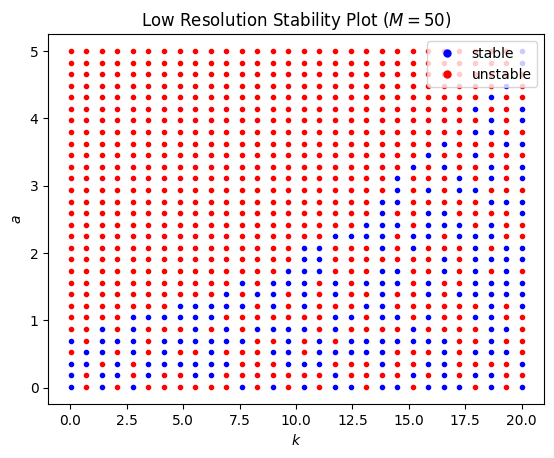

In [7]:
ev = np.real(max_re_ev_low)
# ========== VAR RANGES FOR manual-a-scan-1 FILES ============= 
al,ar,an = 0.01, 5, 30
kl,kr,kn = 0.01, 20, 30
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)
# =============================================================
for i in range(an):
    for j in range(kn):
        c = "red" if ev[i][j] > 0 else "blue"
        plt.plot(ks[j], acts[i],".",color=c, picker=True)
plt.xlabel("$k$")
plt.ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.title("Low Resolution Stability Plot ($M=50$)")

Text(0.5, 1.0, 'High Resolution Stability Plot ($M=100$)')

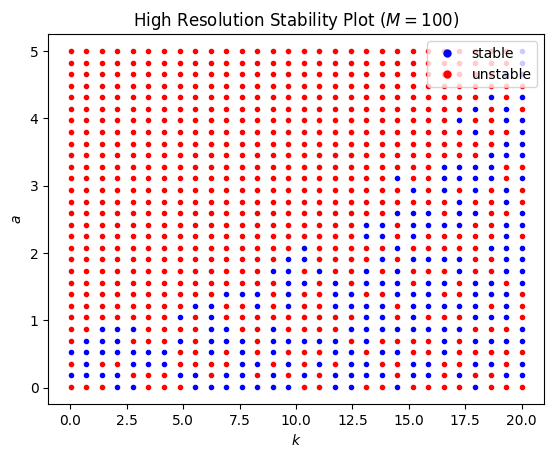

In [8]:
max_re_ev_high = np.zeros((30,30), dtype=np.complex128)

for i in range(30):
    root_dir_low = "data/manual-a-scan-1/M_100/a_{}/".format(i)
    for j in range(30):
        filename = "k_{}".format(j)
        data = np.loadtxt(root_dir_low+filename, delimiter=',', dtype=np.complex128)
        max_re_ev_high[i][j], idx = max_re(data)

ev = np.real(max_re_ev_high)
al,ar,an = 0.01, 5, 30
kl,kr,kn = 0.01, 20, 30
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)

for i in range(an):
    for j in range(kn):
        c = "red" if ev[i][j] > 0 else "blue"
        plt.plot(ks[j],acts[i],".",color=c, picker=True)
plt.xlabel("$k$")
plt.ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.title("High Resolution Stability Plot ($M=100$)")

# Then try sorting, but still to no avail

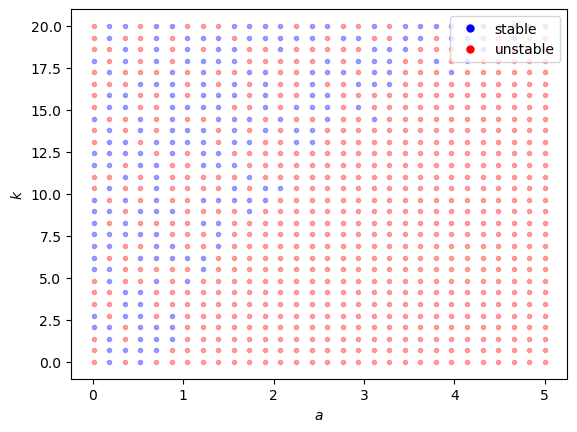

In [47]:
max_re_ev_low = np.zeros((30,30), dtype=np.complex128)
max_re_ev_high = np.zeros((30,30), dtype=np.complex128)

for i in range(30):
    root_dir_low = "data/manual-a-scan-1/M_50/a_{}/".format(i)
    root_dir_high = "data/manual-a-scan-1/M_100/a_{}/".format(i)
    for j in range(30):
        filename = "k_{}".format(j)
        data_low = np.loadtxt(root_dir_low+filename, delimiter=',', dtype=np.complex128)
        data_high = np.loadtxt(root_dir_high+filename, delimiter=',', dtype=np.complex128)
        sort_idx_low = np.argsort(-np.real(data_low))
        sort_idx_high = np.argsort(-np.real(data_high))
        sorted_data_low = data_low[sort_idx_low]
        sorted_data_high = data_high[sort_idx_high]
        max_re_ev_low[i][j] = sorted_data_low[0]
        max_re_ev_high[i][j] = sorted_data_high[0]

al,ar,an = 0.01, 5, 30
kl,kr,kn = 0.01, 20, 30
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)

plot_stability(acts,ks,max_re_ev_high)

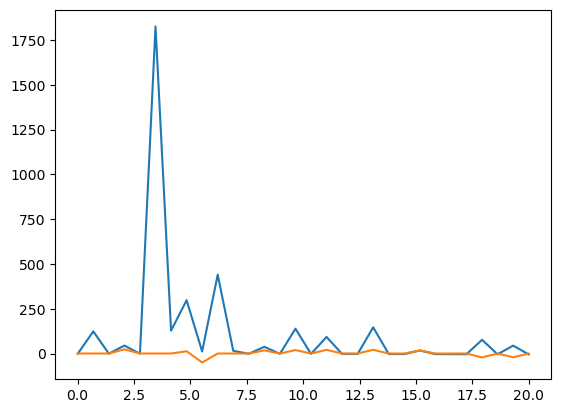

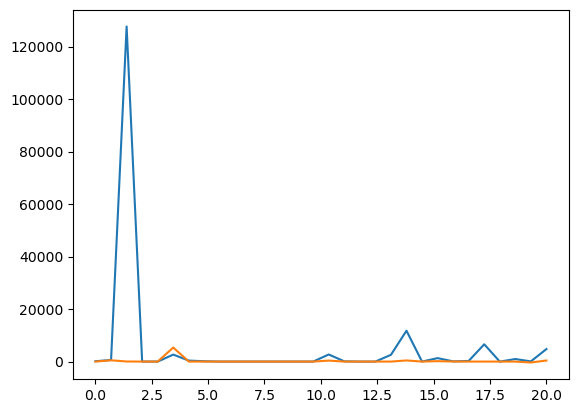

In [48]:
idx=0
plt.figure()
plt.plot(ks, np.real(max_re_ev_low[idx]))
plt.plot(ks, np.imag(max_re_ev_low[idx]))

plt.figure()
plt.plot(ks, np.real(max_re_ev_high[idx]))
plt.plot(ks, np.imag(max_re_ev_high[idx]))

In [58]:
# Motivation for logic behind eigenvalue pruning
# We see that most eigenvalues actually agree (when we sort them)
# So we can take only those that agree!
print(list(np.round(sorted_data_low, 4))[0:20])
print()
print(list(np.round(sorted_data_high, 4))[0:20])

[(44.3055+23.3536j), (-1.0371+0j), (-1.0432+0j), (-1.0649+0j), (-1.0653+0j), (-1.1351+0j), (-1.1397+0j), (-1.2569+0j), (-1.2639+0j), (-1.429+0j), (-1.4371+0j), (-1.6507+0j), (-1.6594+0j), (-1.9219+0j), (-1.931+0j), (-2.2426+0j), (-2.2519+0j), (-2.6126+0j), (-2.6221+0j), (-3.032+0j)]

[(-1.0371+0j), (-1.0432+0j), (-1.0649+0j), (-1.0653+0j), (-1.1351+0j), (-1.1397+0j), (-1.2569+0j), (-1.2639+0j), (-1.429+0j), (-1.4371+0j), (-1.6507+0j), (-1.6594+0j), (-1.9219+0j), (-1.931+0j), (-2.2426+0j), (-2.2519+0j), (-2.6126+0j), (-2.6221+0j), (-3.032+0j), (-3.0416+0j)]


In [10]:
def prune_evs(data_low, data_high, threshold=25, eps=0.001):
    ptr_1 = 0
    ptr_2 = 0
    sort_idx_low = np.argsort(-np.real(data_low))
    sort_idx_high = np.argsort(-np.real(data_high))
    sorted_low = data_low[sort_idx_low]
    sorted_high = data_high[sort_idx_high]
    while not abs(np.real(sorted_low[ptr_1]) - np.real(sorted_high[ptr_2])) < eps:
        if np.real(sorted_low[ptr_1]) > np.real(sorted_high[ptr_2]):
            ptr_1 += 1
        elif np.real(sorted_low[ptr_1]) < np.real(sorted_high[ptr_2]):
            ptr_2 += 1
    # cleaned low might not really be necessary
    # cleaned_low = sorted_low[ptr_1:threshold]
    cleaned_high = sorted_high[ptr_2:threshold]
    return cleaned_high

In [93]:
root_dir_low = "data/manual-a-scan-1/M_50/a_0/"
root_dir_high = "data/manual-a-scan-1/M_100/a_0/"
filename = "k_4"
data_low = np.loadtxt(root_dir_low+filename, delimiter=',', dtype=np.complex128)
data_high = np.loadtxt(root_dir_high+filename, delimiter=',', dtype=np.complex128)
cleaned = prune_evs(data_low, data_high)
print(cleaned)
sort_idx_low = np.argsort(-np.real(data_low))
sort_idx_high = np.argsort(-np.real(data_high))
sorted_low = data_low[sort_idx_low]
sorted_high = data_high[sort_idx_high]
# print(sorted_low[0:25])
# print(sorted_high[0:25])

[-1.06958201+0.j -1.07657624+0.j -1.09759009+0.j -1.09929372+0.j
 -1.16983969+0.j -1.17226283+0.j -1.29127662+0.j -1.29657169+0.j
 -1.46301337+0.j -1.46993606+0.j -1.684544  +0.j -1.69241764+0.j
 -1.95564112+0.j -1.96409606+0.j -2.27620228+0.j -2.2850354 +0.j
 -2.64617777+0.j -2.65526734+0.j -3.06554163+0.j -3.07481307+0.j
 -3.53427934+0.j -3.54368353+0.j -4.05238233+0.j -4.06188655+0.j
 -4.61984529+0.j]


In [11]:
max_re_ev = np.zeros((30,30), dtype=np.complex128)

for i in range(30):
    root_dir_low = "data/manual-a-scan-1/M_50/a_{}/".format(i)
    root_dir_high = "data/manual-a-scan-1/M_100/a_{}/".format(i)
    for j in range(30):
        filename = "k_{}".format(j)
        data_low = np.loadtxt(root_dir_low+filename, delimiter=',', dtype=np.complex128)
        data_high = np.loadtxt(root_dir_high+filename, delimiter=',', dtype=np.complex128)
        sorted_cleaned_evs = prune_evs(data_low, data_high)
        max_re_ev[i][j] = sorted_cleaned_evs[0]

al,ar,an = 0.01, 5, 30
kl,kr,kn = 0.01, 20, 30
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)

# We arrive at this considerably cleaner version of the stability diagram

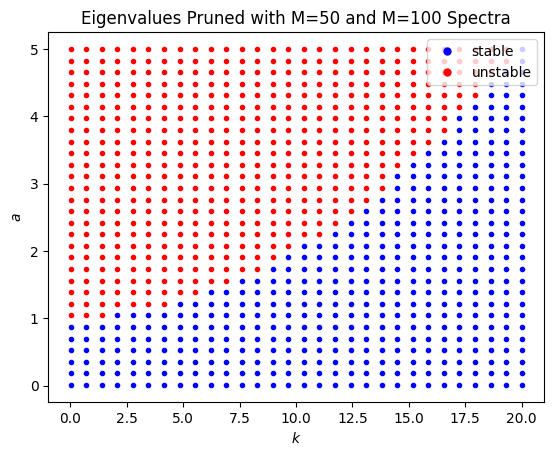

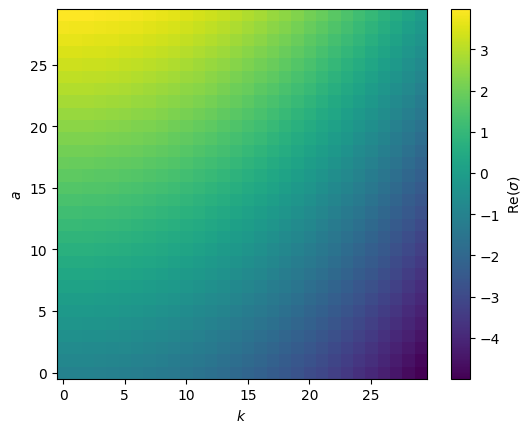

In [13]:
plot_stability(acts,ks,max_re_ev)
plt.title("Eigenvalues Pruned with M=50 and M=100 Spectra")

plt.figure()
plt.imshow(np.real(max_re_ev), origin='lower')
plt.xlabel("$k$")
plt.ylabel("$a$")
plt.colorbar(label="Re$(\sigma)$")
# Next step can be to zoom into the region around k~0 and a~1 to compare to the 2D case

Text(0.5, 0, '$k$')

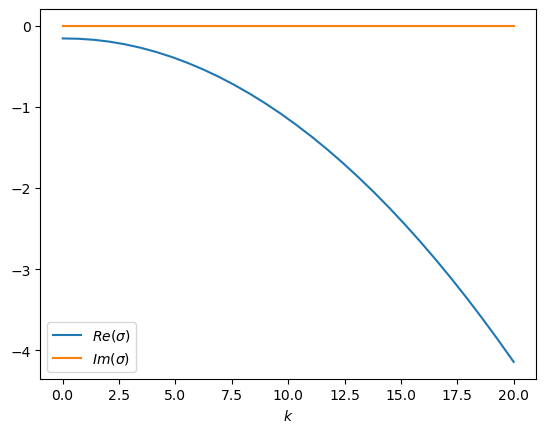

In [122]:
idx=5
plt.figure()
plt.plot(ks, np.real(max_re_ev[idx]))
plt.plot(ks, np.imag(max_re_ev[idx]))
plt.legend(["$Re(\sigma)$","$Im(\sigma)$"])
plt.xlabel("$k$")

In [4]:
n = np.arange(30)
k = 1.5
gd = 5
a = 0.5
M=70

evals_3D, emodes_3D = zeroShearSpectrum3D.spectrum(kx=k,a=a,M=M)
sig_Qzz = -((n**2)*(np.pi**2) + 1 + (0.01*k*k))

In [8]:
sort_idx = np.argsort(-np.real(evals_3D))
evals_3D = evals_3D[sort_idx]
for a,b in zip(evals_3D, sig_Qzz):
    print(a,b)

(-0.5436957850774221+0j) -1.0225
(-0.6154055312713751+0j) -10.892104401089359
(-0.7371846288634204+0j) -40.50091760435743
(-0.9059040339670688+0j) -89.84893960980422
(-1.022500011224543+0j) -158.93617041742974
(-1.0328697416097192+0j) -247.76261002723396
(-1.0641530622756055+0j) -356.3282584392169
(-1.0995023155725978+0j) -484.6331156533785
(-1.1611480082270982+0j) -632.677181669719
(-1.2426892720052336+0j) -800.460456488238
(-1.4111309658402944+0j) -987.9829401089358
(-1.417939157070525+0j) -1195.2446325318124
(-1.6417837787073335+0j) -1422.2455337568676
(-1.7282259983542492+0j) -1668.9856437841015
(-1.9147114901430786+0j) -1935.4649626135142
(-2.0957182487886605+0j) -2221.6834902451055
(-2.2375927039718086+0j) -2527.6412266788757
(-2.511391409683543+0j) -2853.3381719148247
(-2.611281209439437+0j) -3198.774325952952
(-2.9717202926084934+0j) -3563.9496887932582
(-3.0391710766213498+0j) -3948.8642604357433
(-3.4676486465799266+0j) -4353.518040880407
(-3.5301749009195427+0j) -4777.911030

(-1.022500011224543+0j)


c:\Users\jaspe\Academics\senior-thesis\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


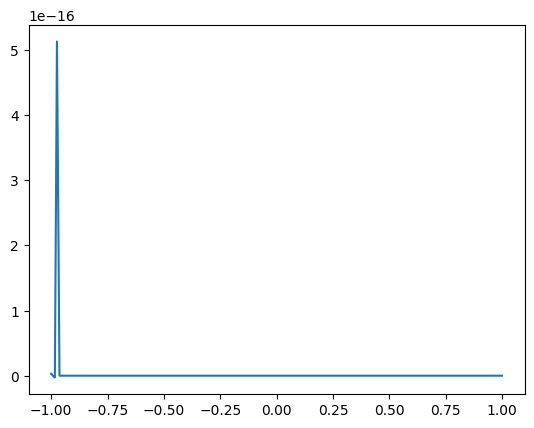

In [11]:
_, y = cheb(M)
plt.plot(y, emodes_3D[7*M:8*M, sort_idx[4]])
print(evals_3D[sort_idx[4]])